In [1]:
# generate random data matrix
n,d = 6,4
X = randn(n,d)

# optional: give it linearly dependent columns
# X[:,3] = X[:,2]

6×4 Array{Float64,2}:
  1.00211    -0.390615    -0.425178  -0.680721
  0.179622    0.671134     0.536554   1.40986 
 -0.0774974  -1.20475      0.35991   -0.21789 
 -0.0822084  -1.22753      1.32119    0.118184
  0.309808    0.00786678   0.316763  -0.165694
  2.01023    -0.149587    -0.255375  -0.246017

In [2]:
# form data from noisy linear model
β♮ = randn(d)
y = X*β♮ + .1*randn(n);

In [3]:
# look at least squares objective as a function of β
f(β) = norm(y - X*β)^2

f (generic function with 1 method)

In [4]:
using PyPlot

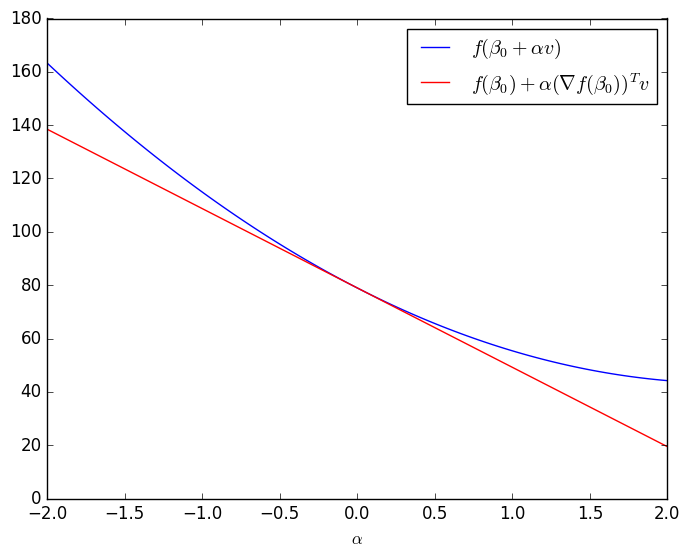

PyObject <matplotlib.legend.Legend object at 0x3257f44d0>

In [8]:
# gradient at w0 approximates f(w) near w0
β0 = randn(d)
v = randn(d)
alphas = linspace(-2,2,100)
∇f = 2X'*X*β0 - 2X'*y
plot(alphas, [f(β0 + alpha*v) for alpha in alphas], label=L"$f(\beta_0 + \alpha v)$")
plot(alphas, [f(β0) + alpha*dot(∇f, v) for alpha in alphas], "r", label=L"$f(\beta_0) + \alpha (\nabla f(\beta_0))^T v$")
xlabel(L"$\alpha$")
legend()

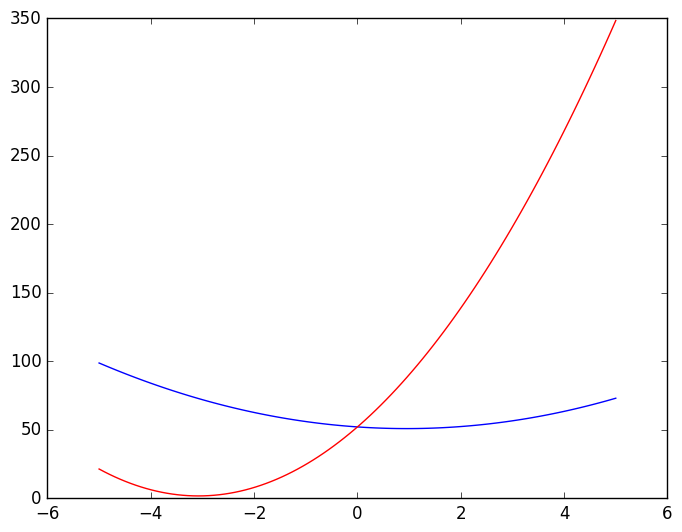

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325e80c10>

In [11]:
# function decreases fastest in the -∇f(w) direction
β0 = randn(d)
v = randn(d)
∇f = 2X'*X*β0 - 2X'*y
v_normalized = v/norm(v)
∇f_normalized = ∇f/norm(∇f)
alphas = linspace(-5,5,100)
plot(alphas, [f(β0 + alpha*v_normalized) for alpha in alphas])
plot(alphas, [f(β0 + alpha*∇f_normalized) for alpha in alphas],"r")

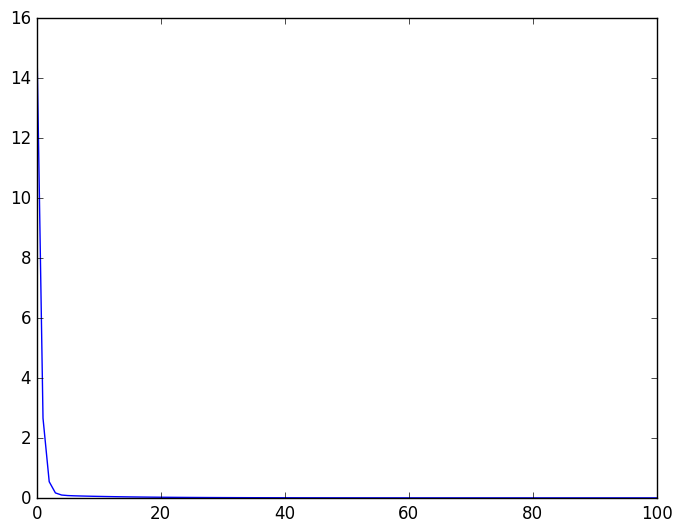

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3268f7a50>

In [16]:
# gradient descent

alpha = .1      # small constant step size
β = randn(d)     # start at a random w
fks = Float64[]  # a list to record all the values f(w) we see
push!(fks, f(β)) # record the initial value

# start descending!
for k=1:100
    β -= alpha*(2X'*X*β - 2X'*y) # take a gradient step
    push!(fks, f(β))             # record its value
end
plot(fks)
# semilogy(fks)
# loglog(fks)